In [1]:
import warnings
warnings.filterwarnings('ignore')

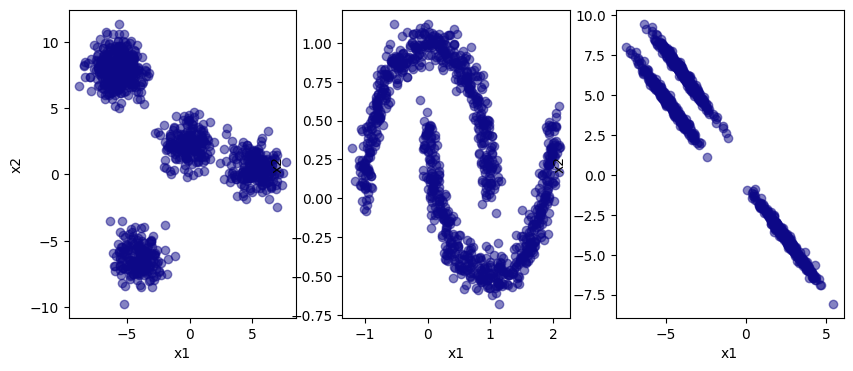

In [2]:
from sklearn.datasets import make_blobs, make_moons
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=5, random_state=5)
x1 = X[:,0]
x2 = X[:,1]

W, v = make_moons(n_samples=1000, noise=0.07)
w1 = W[:,0]
w2 = W[:,1]

P, q = make_blobs(n_samples=1000, centers=3, random_state=100) # 3
transformation = [[0.80, -1.00], [-0.4, 0.7]] #[[0.1, -0.9], [-2, 1.5]]
P = np.dot(P, transformation)
p1 = P[:,0]
p2 = P[:,1]


clustering_colors = {  -1: plt.get_cmap("Greys")(0.7) , # ; # noise 
                        0: plt.get_cmap("plasma")(0) ,
                        1: plt.get_cmap("plasma")(0.4) ,
                        2: plt.get_cmap("plasma")(0.8) ,
                        3: plt.get_cmap("plasma")(0.9) }
        
for i in range(4,30):
    clustering_colors[i] = plt.get_cmap("plasma")(np.random.rand(1))
    
def get_colors(cluster_list):
    color_list = []
    for i in cluster_list:
        color_list.append(clustering_colors[i])
    return color_list    
    
    

f, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(x1, x2, color = get_colors([0]), alpha=0.5)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

ax2.scatter(w1, w2, color = get_colors([0]), alpha=0.5)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

ax3.scatter(p1, p2, color = get_colors([0]), alpha=0.5)
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")

f.set_size_inches([10,4])

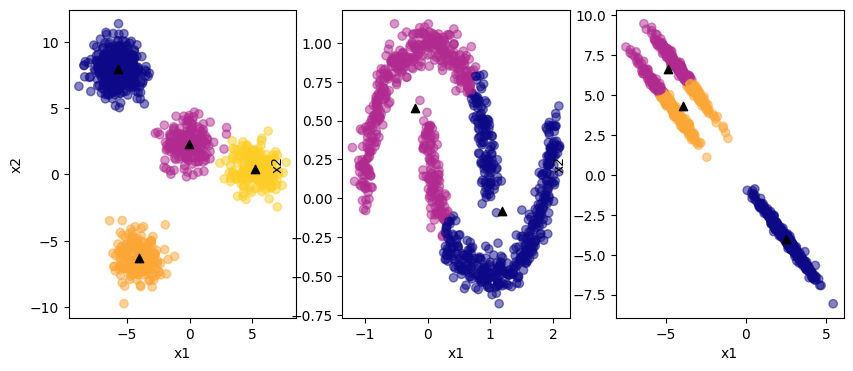

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(X)
X_labels = kmeans.labels_
X_clusters = kmeans.cluster_centers_

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(W)
W_labels = kmeans.labels_
W_clusters = kmeans.cluster_centers_

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(P)
P_labels = kmeans.labels_
P_clusters = kmeans.cluster_centers_

f, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(x1, x2, c = get_colors(X_labels), alpha=0.5)
ax1.scatter(X_clusters[:,0], X_clusters[:,1], color="k", marker="^")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

ax2.scatter(w1, w2, c = get_colors(W_labels), alpha=0.5)
ax2.scatter(W_clusters[:,0], W_clusters[:,1], color="k", marker="^")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

ax3.scatter(p1, p2, c = get_colors(P_labels), alpha=0.5)
ax3.scatter(P_clusters[:,0], P_clusters[:,1], color="k", marker="^")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")

f.set_size_inches([10,4])

In [4]:
num_k = [1, 2, 3, 4, 5, 6, 7]
errors = []

for k in num_k:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
    errors.append(kmeans.inertia_)

Text(0, 0.5, 'total distance')

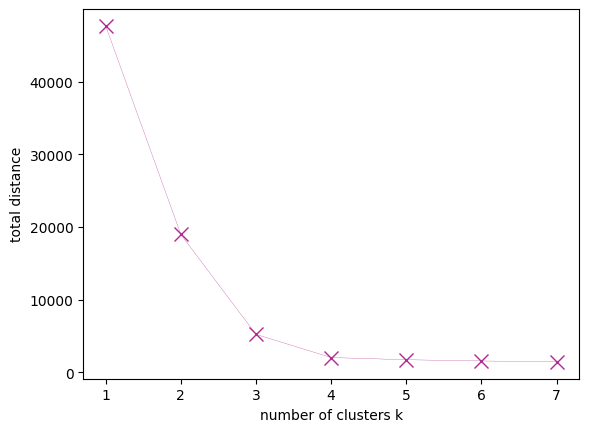

In [5]:
f, (ax) = plt.subplots(1,1)
ax.plot(num_k, errors, lw=0.2, marker= "x", ms= 10, color= get_colors([1])[0] )
ax.set_xlabel("number of clusters k")
ax.set_ylabel("total distance")

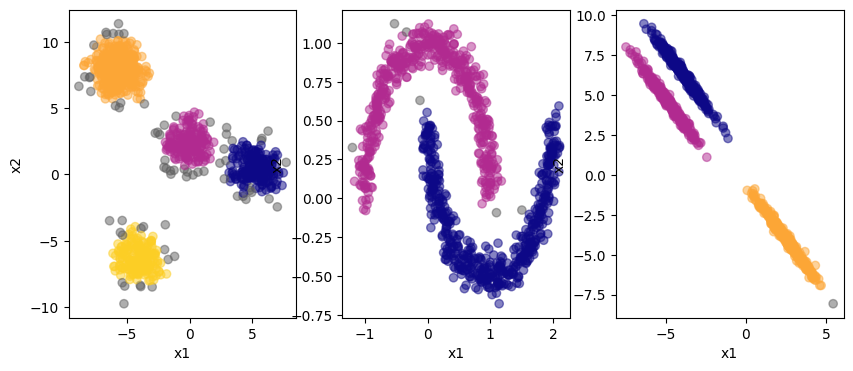

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
X_labels = dbscan.labels_

dbscan = DBSCAN(eps=0.1, min_samples=5).fit(W)
W_labels = dbscan.labels_

dbscan = DBSCAN(eps=1, min_samples=5).fit(P)
P_labels = dbscan.labels_

f, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(x1, x2, c = get_colors(X_labels), alpha=0.5)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

ax2.scatter(w1, w2, c = get_colors(W_labels), alpha=0.5)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

ax3.scatter(p1, p2, c = get_colors(P_labels), alpha=0.5)
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")

f.set_size_inches([10,4])

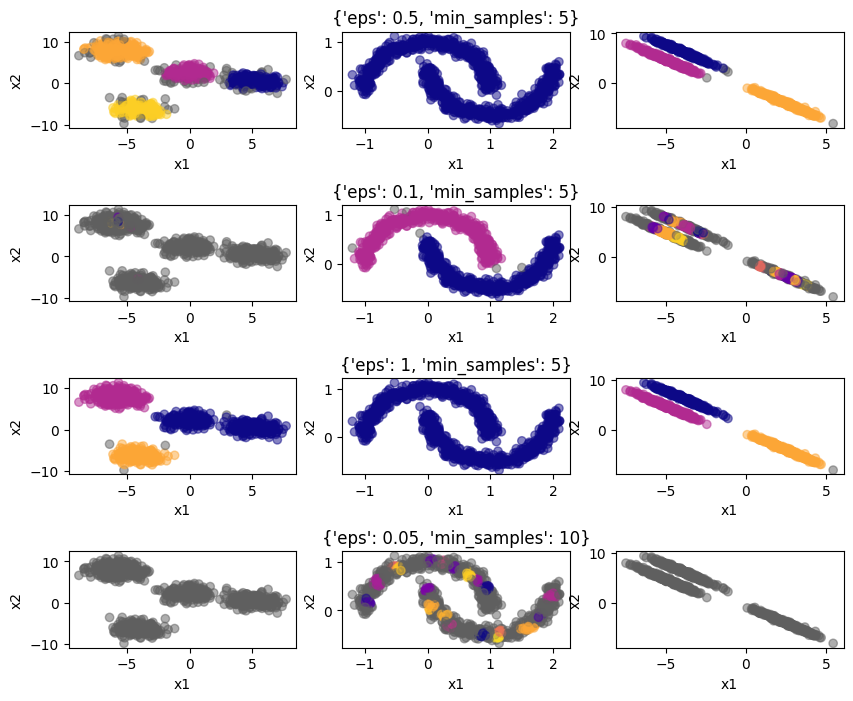

In [7]:
cases = {"1": {"eps": 0.5, "min_samples": 5},
         "2": {"eps": 0.1, "min_samples": 5},
         "3": {"eps": 1, "min_samples": 5},
         "4": {"eps": 0.05, "min_samples": 10},
        }

labels_X = dict()
labels_W = dict()
labels_P = dict()

for case in cases.keys():
    dbscan = DBSCAN(eps=cases[case]["eps"], min_samples=cases[case]["min_samples"]).fit(X)
    labels_X[case] = dbscan.labels_
    
    dbscan = DBSCAN(eps=cases[case]["eps"], min_samples=cases[case]["min_samples"]).fit(W)
    labels_W[case] = dbscan.labels_
    
    dbscan = DBSCAN(eps=cases[case]["eps"], min_samples=cases[case]["min_samples"]).fit(P)
    labels_P[case] = dbscan.labels_

    
f = plt.figure()

for i in [1,2,3,4]:
    f.add_subplot(4, 3, i*3-2)

    plt.scatter(x1, x2, c = get_colors(labels_X[str(i)]), alpha=0.5)
    plt.xlabel("x1")
    plt.ylabel("x2")

    f.add_subplot(4, 3, i*3-1)
    
    plt.scatter(w1, w2, c = get_colors(labels_W[str(i)]), alpha=0.5)
    plt.xlabel("x1")
    plt.ylabel("x2")
    
    plt.title(cases[str(i)])

    f.add_subplot(4, 3, i*3)
    
    plt.scatter(p1, p2, c = get_colors(labels_P[str(i)]), alpha=0.5)
    plt.xlabel("x1")
    plt.ylabel("x2")
        
   
plt.subplots_adjust(wspace=0.2, hspace=0.8)
f.set_size_inches([10,8])

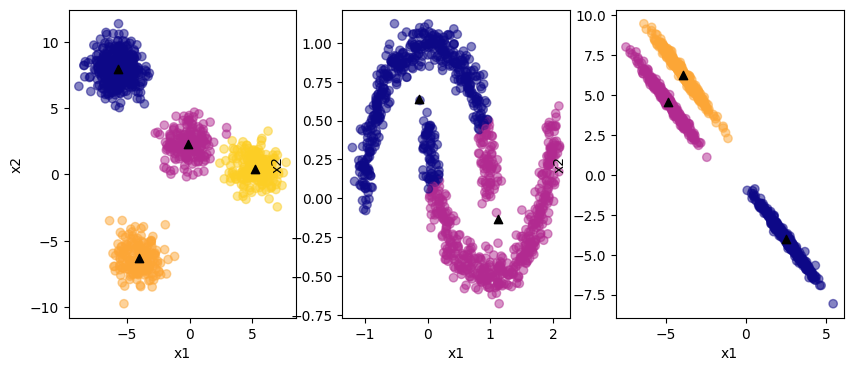

In [8]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4, random_state=1).fit(X)
X_labels = gm.predict(X)
X_clusters = gm.means_

gm = GaussianMixture(n_components=2, random_state=1).fit(W)
W_labels = gm.predict(W)
W_clusters = gm.means_

gm = GaussianMixture(n_components=3, random_state=1).fit(P)
P_labels = gm.predict(P)
P_clusters = gm.means_

f, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.scatter(x1, x2, c = get_colors(X_labels), alpha=0.5)
ax1.scatter(X_clusters[:,0], X_clusters[:,1], color="k", marker="^")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

ax2.scatter(w1, w2, c = get_colors(W_labels), alpha=0.5)
ax2.scatter(W_clusters[:,0], W_clusters[:,1], color="k", marker="^")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

ax3.scatter(p1, p2, c = get_colors(P_labels), alpha=0.5)
ax3.scatter(P_clusters[:,0], P_clusters[:,1], color="k", marker="^")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")

f.set_size_inches([10,4])

In [9]:
import pandas as pd

if 'google.colab' in str(get_ipython()):
  raw_data = pd.read_excel("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/Power_system_data_DE.xlsx")
else:
  raw_data = pd.read_excel("references/Power_system_data_DE.xlsx")

raw_data.head(20)

,Unnamed: 0,Unnamed: 1,DE,DE.1,DE.2,DE.3,DE.4
0,NaN,NaN,load,wind,wind_offshore,wind_onshore,solar
1,NaN,NaN,actual_entsoe_transparency,profile,profile,profile,profile
2,NaN,NaN,ENTSO-E Transparency,own calculation based on ENTSO-E Transparency ...,own calculation based on ENTSO-E Transparency ...,own calculation based on ENTSO-E Transparency ...,own calculation based on ENTSO-E Transparency ...
3,NaN,NaN,https://transparency.entsoe.eu/load-domain/r2/...,NaN,NaN,NaN,NaN
4,NaN,NaN,MW,fraction,fraction,fraction,fraction
5,utc_timestamp,cet_cest_timestamp,NaN,NaN,NaN,NaN,NaN
6,2014-12-31 23:00:00,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
7,2014-12-31 23:15:00,2015-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN
8,2014-12-31 23:30:00,2015-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
9,2014-12-31 23:45:00,2015-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN


In [10]:
from datetime import datetime

raw_data.columns = ["utc_timestamp", "cet_timestamp", "demand", "wind", "offshore", "onshore", "solar"]
data = raw_data.drop(index=[0,1,2,3,4,5]).fillna(0)
for i, row in data.iterrows():
    data.at[i,"year"] = row["utc_timestamp"].year
    data.at[i,"month"] = row["utc_timestamp"].month
    data.at[i,"day"] = row["utc_timestamp"].day
    data.at[i,"date"] = row["utc_timestamp"].date()
    data.at[i,"time"] = row["utc_timestamp"].time()
    
data.head()

,utc_timestamp,cet_timestamp,demand,wind,offshore,onshore,solar,year,month,day,date,time
6,2014-12-31 23:00:00,2015-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,2014.0,12.0,31.0,2014-12-31,23:00:00
7,2014-12-31 23:15:00,2015-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,2014.0,12.0,31.0,2014-12-31,23:15:00
8,2014-12-31 23:30:00,2015-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,2014.0,12.0,31.0,2014-12-31,23:30:00
9,2014-12-31 23:45:00,2015-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,2014.0,12.0,31.0,2014-12-31,23:45:00
10,2015-01-01 00:00:00,2015-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,2015.0,1.0,1.0,2015-01-01,00:00:00


In [11]:
data_2018 = data.loc[data["year"]==2018]
data_2018

,utc_timestamp,cet_timestamp,demand,wind,offshore,onshore,solar,year,month,day,date,time
105226,2018-01-01 00:00:00,2018-01-01 01:00:00,41107.50,0.7591,0.8313,0.7528,0.0,2018.0,1.0,1.0,2018-01-01,00:00:00
105227,2018-01-01 00:15:00,2018-01-01 01:15:00,40690.50,0.7657,0.8635,0.7571,0.0,2018.0,1.0,1.0,2018-01-01,00:15:00
105228,2018-01-01 00:30:00,2018-01-01 01:30:00,40215.44,0.7778,0.8710,0.7695,0.0,2018.0,1.0,1.0,2018-01-01,00:30:00
105229,2018-01-01 00:45:00,2018-01-01 01:45:00,40436.86,0.7868,0.8789,0.7786,0.0,2018.0,1.0,1.0,2018-01-01,00:45:00
105230,2018-01-01 01:00:00,2018-01-01 02:00:00,40553.70,0.7905,0.8874,0.7819,0.0,2018.0,1.0,1.0,2018-01-01,01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
140261,2018-12-31 22:45:00,2018-12-31 23:45:00,44899.69,0.4469,0.6210,0.4269,0.0,2018.0,12.0,31.0,2018-12-31,22:45:00
140262,2018-12-31 23:00:00,2019-01-01 00:00:00,43168.15,0.4529,0.6293,0.4327,0.0,2018.0,12.0,31.0,2018-12-31,23:00:00
140263,2018-12-31 23:15:00,2019-01-01 00:15:00,43151.57,0.4681,0.6289,0.4496,0.0,2018.0,12.0,31.0,2018-12-31,23:15:00
140264,2018-12-31 23:30:00,2019-01-01 00:30:00,42827.22,0.4828,0.6274,0.4661,0.0,2018.0,12.0,31.0,2018-12-31,23:30:00


In [12]:
data_2018_pivot = data_2018.pivot(index=["date"], columns=["time"], values=["wind","solar","demand"])
data_2018_pivot

wind                                                        \
time       00:00:00 00:15:00 00:30:00 00:45:00 01:00:00 01:15:00 01:30:00   
date                                                                        
2018-01-01   0.7591   0.7657   0.7778   0.7868   0.7905   0.7944   0.7878   
2018-01-02   0.3944   0.3949   0.3934   0.3893   0.3860   0.3789   0.3787   
2018-01-03   0.7540   0.7664   0.7765   0.7828   0.7964   0.8093   0.8139   
2018-01-04   0.9271   0.9225   0.9151   0.9047   0.8946   0.8888   0.8858   
2018-01-05   0.8325   0.8460   0.8562   0.8583   0.8642   0.8757   0.8787   
...             ...      ...      ...      ...      ...      ...      ...   
2018-12-27   0.2880   0.2895   0.2893   0.2851   0.2810   0.2832   0.2829   
2018-12-28   0.2167   0.2153   0.2140   0.2104   0.2054   0.1987   0.1929   
2018-12-29   0.2318   0.2360   0.2410   0.2493   0.2506   0.2501   0.2478   
2018-12-30   0.6881   0.6883   0.6911   0.6895   0.6868   0.6842   0.6794   
2018-12-31   0.1727   0.1682   0.1631   0.1577   0.1526   0.1487   0.1477   

                                       ...    demand                      \
time       01:45:00 02:00:00 02:15:00  ...  21:30:00  21:45:00  22:00:00   
date                                   ...                                 
2018-01-01   0.7879   0.8048   0.8140  ...  46478.69  45942.63  44647.53   
2018-01-02   0.3764   0.3746   0.3820  ...  55288.77  54139.13  52994.37   
2018-01-03   0.8196   0.8401   0.8575  ...  58552.29  57078.40  56366.52   
2018-01-04   0.8891   0.8750   0.8649  ...  58703.71  57711.98  56356.32   
2018-01-05   0.8756   0.8785   0.8688  ...  54919.61  53992.10  53354.64   
...             ...      ...      ...  ...       ...       ...       ...   
2018-12-27   0.2811   0.2801   0.2830  ...  51086.44  50447.16  49853.24   
2018-12-28   0.1893   0.1884   0.1903  ...  51858.28  51319.59  50177.74   
2018-12-29   0.2458   0.2443   0.2473  ...  50810.94  49663.63  48975.79   
2018-12-30   0.6795   0.6768   0.6784  ...  47754.48  47219.02  46749.31   
2018-12-31   0.1475   0.1429   0.1371  ...  47266.06  46876.10  46212.79   

                                                                        \
time        22:15:00  22:30:00  22:45:00  23:00:00  23:15:00  23:30:00   
date                                                                     
2018-01-01  43989.39  43253.15  42349.21  41847.29  41035.76  40468.81   
2018-01-02  52260.96  51553.50  50760.99  49669.29  48879.58  48385.56   
2018-01-03  54982.17  53792.97  53022.56  51850.51  50745.77  50515.68   
2018-01-04  54915.72  53810.35  52766.41  51180.27  50716.50  50414.69   
2018-01-05  52324.00  51190.13  50188.70  49513.35  48611.48  47778.13   
...              ...       ...       ...       ...       ...       ...   
2018-12-27  48937.93  48349.58  47566.12  46844.44  46551.30  45754.90   
2018-12-28  49299.75  48571.00  48252.61  47561.57  46780.70  46148.57   
2018-12-29  48488.65  47807.15  46856.65  45599.00  44935.01  44482.17   
2018-12-30  45982.74  45051.08  44264.46  43705.56  43265.03  42591.12   
2018-12-31  45931.44  45502.07  44899.69  43168.15  43151.57  42827.22   

                      
time        23:45:00  
date                  
2018-01-01  39888.47  
2018-01-02  48135.47  
2018-01-03  50007.18  
2018-01-04  49777.30  
2018-01-05  47068.07  
...              ...  
2018-12-27  45444.12  
2018-12-28  45683.72  
2018-12-29  44129.05  
2018-12-30  42039.58  
2018-12-31  42758.72  

[365 rows x 288 columns]

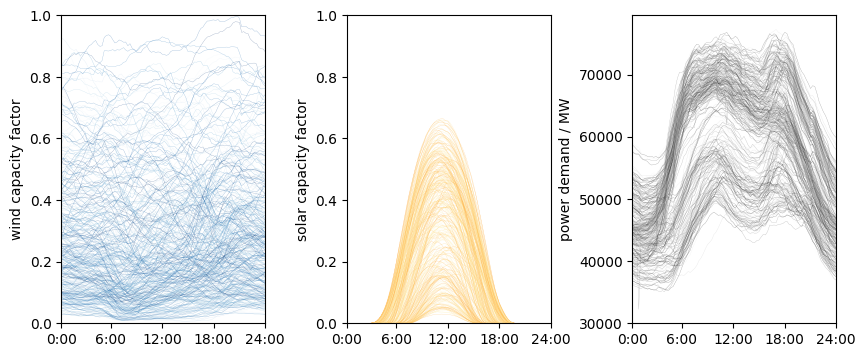

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(1,3)

for i, row in data_2018_pivot.iterrows():
    ax1.plot(row["wind"].values, lw=0.2, alpha=0.5, color=plt.get_cmap("Blues")(np.random.rand(1)))  
    ax2.plot(row["solar"].values, lw=0.2, alpha=0.5, color=plt.get_cmap("YlOrBr")(np.random.rand(1)*0.5))
    ax3.plot(row["demand"].values, lw=0.2, alpha=0.5, color=plt.get_cmap("Greys")(np.random.rand(1)))
    
ax1.set_xticks([0, 23, 47, 71, 95], labels=["0:00", "6:00", "12:00", "18:00", "24:00"])
ax2.set_xticks([0, 23, 47, 71, 95], labels=["0:00", "6:00", "12:00", "18:00", "24:00"])
ax3.set_xticks([0, 23, 47, 71, 95], labels=["0:00", "6:00", "12:00", "18:00", "24:00"])

ax1.set_ylim([0,1])
ax2.set_ylim([0,1])

ax1.set_xlim([0,95])
ax2.set_xlim([0,95])
ax3.set_xlim([0,95])

ax1.set_ylabel("wind capacity factor")
ax2.set_ylabel("solar capacity factor")
ax3.set_ylabel("power demand / MW")

plt.subplots_adjust(wspace=0.4)

f.set_size_inches([10,4])

In [14]:
wind_data = data_2018[["date", "utc_timestamp","wind"]].melt(id_vars="date", value_vars="wind").drop("variable", axis=1)
solar_data = data_2018[["date", "utc_timestamp","solar"]].melt(id_vars="date", value_vars="solar").drop("variable", axis=1)
demand_data = data_2018[["date", "utc_timestamp","demand"]].melt(id_vars="date", value_vars="demand").drop("variable", axis=1)

solar_data

,date,value
0,2018-01-01,0.0
1,2018-01-01,0.0
2,2018-01-01,0.0
3,2018-01-01,0.0
4,2018-01-01,0.0
...,...,...
35035,2018-12-31,0.0
35036,2018-12-31,0.0
35037,2018-12-31,0.0
35038,2018-12-31,0.0


In [15]:
from sklearn.preprocessing import StandardScaler

wind_scaler = StandardScaler()
wind_scaled = pd.DataFrame(columns=["date","value"])
wind_scaled["date"] = wind_data["date"]
wind_scaled["value"] = wind_scaler.fit_transform(np.array(wind_data["value"]).reshape(-1, 1))

solar_scaler = StandardScaler()
solar_scaled = pd.DataFrame(columns=["date","value"])
solar_scaled["date"] = solar_data["date"]
solar_scaled["value"] = solar_scaler.fit_transform(np.array(solar_data["value"]).reshape(-1, 1))

demand_scaler = StandardScaler()
demand_scaled = pd.DataFrame(columns=["date","value"])
demand_scaled["date"] = demand_data["date"]
demand_scaled["value"] = demand_scaler.fit_transform(np.array(demand_data["value"]).reshape(-1, 1))

input_data = pd.DataFrame() 

for day in wind_data["date"].drop_duplicates():
    wind = wind_scaled.loc[wind_scaled["date"]==day]["value"].values
    solar = solar_scaled.loc[solar_scaled["date"]==day]["value"].values
    demand = demand_scaled.loc[demand_scaled["date"]==day]["value"].values
    
    day_series = np.concatenate([wind, solar, demand])
    
    input_data[day] = day_series 

input_data

,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2018-12-22,2018-12-23,2018-12-24,2018-12-25,2018-12-26,2018-12-27,2018-12-28,2018-12-29,2018-12-30,2018-12-31
0,2.460270,0.623795,2.434588,3.306246,2.829881,0.218935,0.306050,0.697315,2.146050,-0.136577,...,2.501058,0.691776,0.274830,0.636888,1.140949,0.088010,-0.271026,-0.194989,2.102744,-0.492592
1,2.493504,0.626313,2.497029,3.283083,2.897861,0.221453,0.335257,0.710407,2.127922,-0.141612,...,2.491490,0.686236,0.339789,0.633363,1.139438,0.095563,-0.278076,-0.173840,2.103751,-0.515252
2,2.554435,0.618760,2.547889,3.245819,2.949224,0.225985,0.358420,0.712421,2.122886,-0.170315,...,2.431567,0.618256,0.332235,0.646455,1.144977,0.094556,-0.284623,-0.148662,2.117851,-0.540933
3,2.599755,0.598114,2.579613,3.193449,2.959799,0.190232,0.405251,0.733067,2.122383,-0.184415,...,2.357544,0.574447,0.325689,0.661562,1.138935,0.073407,-0.302751,-0.106867,2.109794,-0.568125
4,2.618387,0.581496,2.648097,3.142590,2.989509,0.203325,0.439493,0.749685,2.141014,-0.191968,...,2.272946,0.564879,0.337775,0.660051,1.123828,0.052761,-0.327928,-0.100320,2.096198,-0.593807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-1.475803,-0.625654,-0.397085,-0.422973,-0.683493,-1.121168,-0.848942,-0.265237,-0.258524,-0.357837,...,-1.148783,-1.411650,-1.322191,-1.322631,-1.187623,-0.948548,-0.879167,-1.020252,-1.282236,-1.218035
284,-1.526531,-0.735988,-0.515540,-0.583279,-0.751749,-1.216521,-0.938565,-0.348816,-0.341451,-0.469038,...,-1.242857,-1.516934,-1.408817,-1.348442,-1.202761,-1.021486,-0.949008,-1.147358,-1.338722,-1.393036
285,-1.608549,-0.815802,-0.627192,-0.630151,-0.842898,-1.316239,-0.989404,-0.434623,-0.429332,-0.539963,...,-1.328017,-1.597543,-1.452584,-1.380525,-1.243085,-1.051113,-1.027928,-1.214466,-1.383245,-1.394712
286,-1.665849,-0.865730,-0.650447,-0.660653,-0.927121,-1.382748,-1.034007,-0.494846,-0.527067,-0.600682,...,-1.379236,-1.652659,-1.478876,-1.426316,-1.306153,-1.131602,-1.091815,-1.260232,-1.451354,-1.427492


In [16]:
input_array = np.array(input_data).T
input_array.shape

(365, 288)

In [17]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10).fit(input_array)
profiles_labels = kmeans.labels_
profiles_clusters = kmeans.cluster_centers_

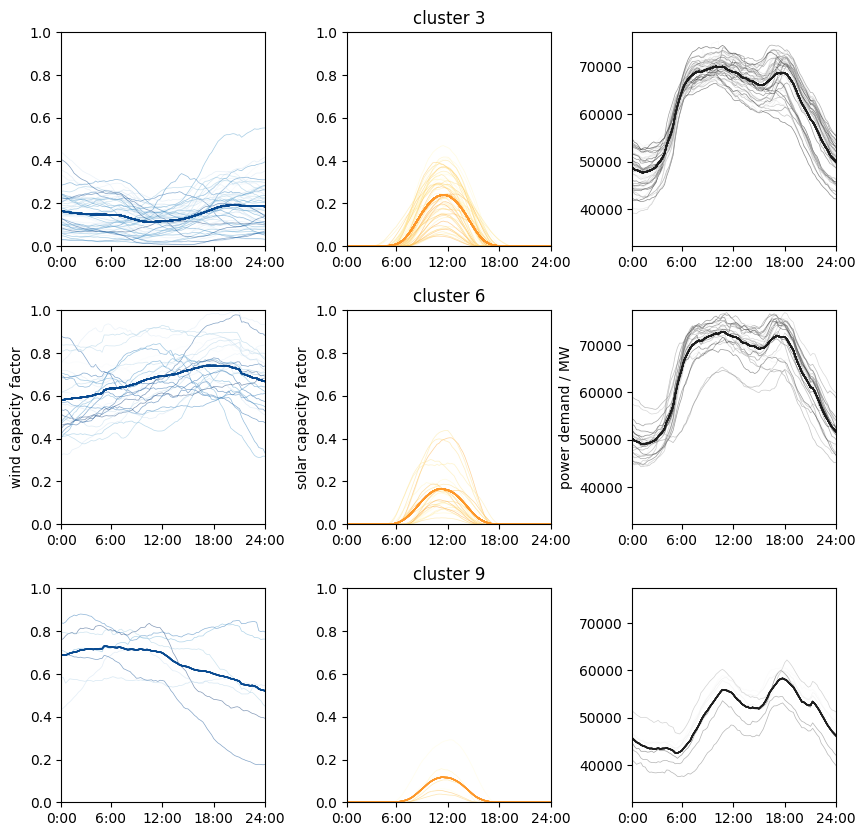

In [18]:
clusters_plot = [3,6,9]

f, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3,3)

for i in range(0,364):
    if profiles_labels[i] == clusters_plot[0]:
        ax1.plot(data_2018_pivot.iloc[i]["wind"].values, lw=0.5, alpha=0.5, color=plt.get_cmap("Blues")(np.random.rand(1)))  
        ax1.plot(wind_scaler.inverse_transform(profiles_clusters[clusters_plot[0]][0:96].reshape(-1, 1)), lw=1, alpha=1, color=plt.get_cmap("Blues")(0.9))
        ax2.plot(data_2018_pivot.iloc[i]["solar"].values, lw=0.5, alpha=0.5, color=plt.get_cmap("YlOrBr")(np.random.rand(1)*0.5))
        ax2.plot(solar_scaler.inverse_transform(profiles_clusters[clusters_plot[0]][96:192].reshape(-1, 1)), lw=1, alpha=1, color=plt.get_cmap("YlOrBr")(0.5))
        ax3.plot(data_2018_pivot.iloc[i]["demand"].values, lw=0.5, alpha=0.5, color=plt.get_cmap("Greys")(np.random.rand(1)))  
        ax3.plot(demand_scaler.inverse_transform(profiles_clusters[clusters_plot[0]][192:288].reshape(-1, 1)), lw=1, alpha=1, color=plt.get_cmap("Greys")(0.9))
    if profiles_labels[i] == clusters_plot[1]:
        ax4.plot(data_2018_pivot.iloc[i]["wind"].values, lw=0.5, alpha=0.5, color=plt.get_cmap("Blues")(np.random.rand(1)))  
        ax4.plot(wind_scaler.inverse_transform(profiles_clusters[clusters_plot[1]][0:96].reshape(-1, 1)), lw=1, alpha=1, color=plt.get_cmap("Blues")(0.9))
        ax5.plot(data_2018_pivot.iloc[i]["solar"].values, lw=0.5, alpha=0.5, color=plt.get_cmap("YlOrBr")(np.random.rand(1)*0.5))
        ax5.plot(solar_scaler.inverse_transform(profiles_clusters[clusters_plot[1]][96:192].reshape(-1, 1)), lw=1, alpha=1, color=plt.get_cmap("YlOrBr")(0.5))
        ax6.plot(data_2018_pivot.iloc[i]["demand"].values, lw=0.5, alpha=0.5, color=plt.get_cmap("Greys")(np.random.rand(1)))    
        ax6.plot(demand_scaler.inverse_transform(profiles_clusters[clusters_plot[1]][192:288].reshape(-1, 1)), lw=1, alpha=1, color=plt.get_cmap("Greys")(0.9))
    if profiles_labels[i] == clusters_plot[2]:
        ax7.plot(data_2018_pivot.iloc[i]["wind"].values, lw=0.5, alpha=0.5, color=plt.get_cmap("Blues")(np.random.rand(1)))  
        ax7.plot(wind_scaler.inverse_transform(profiles_clusters[clusters_plot[2]][0:96].reshape(-1, 1)), lw=1, alpha=1, color=plt.get_cmap("Blues")(0.9))
        ax8.plot(data_2018_pivot.iloc[i]["solar"].values, lw=0.5, alpha=0.5, color=plt.get_cmap("YlOrBr")(np.random.rand(1)*0.5))
        ax8.plot(solar_scaler.inverse_transform(profiles_clusters[clusters_plot[2]][96:192].reshape(-1, 1)), lw=1, alpha=1, color=plt.get_cmap("YlOrBr")(0.5))
        ax9.plot(data_2018_pivot.iloc[i]["demand"].values, lw=0.5, alpha=0.5, color=plt.get_cmap("Greys")(np.random.rand(1)))    
        ax9.plot(demand_scaler.inverse_transform(profiles_clusters[clusters_plot[2]][192:288].reshape(-1, 1)), lw=1, alpha=1, color=plt.get_cmap("Greys")(0.9))

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.set_xticks([0, 23, 47, 71, 95], labels=["0:00", "6:00", "12:00", "18:00", "24:00"])
    ax.set_xlim([0,95])

for ax in [ax1, ax2, ax4, ax5, ax7, ax8]:    
    ax.set_ylim([0,1])
    
for ax in [ax3, ax6, ax9]:    
    ax.set_ylim([data_2018_pivot["demand"].values.min(),data_2018_pivot["demand"].values.max()])

ax4.set_ylabel("wind capacity factor")
ax5.set_ylabel("solar capacity factor")
ax6.set_ylabel("power demand / MW")

ax2.set_title("cluster "+ str(clusters_plot[0]))
ax5.set_title("cluster "+ str(clusters_plot[1]))
ax8.set_title("cluster "+ str(clusters_plot[2]))

plt.subplots_adjust(wspace=0.4, hspace=0.3)

f.set_size_inches([10,10])

In [19]:
num_k = range(1,30)
errors = []

for k in num_k:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(input_array)
    errors.append(kmeans.inertia_)

Text(0, 0.5, 'total distance')

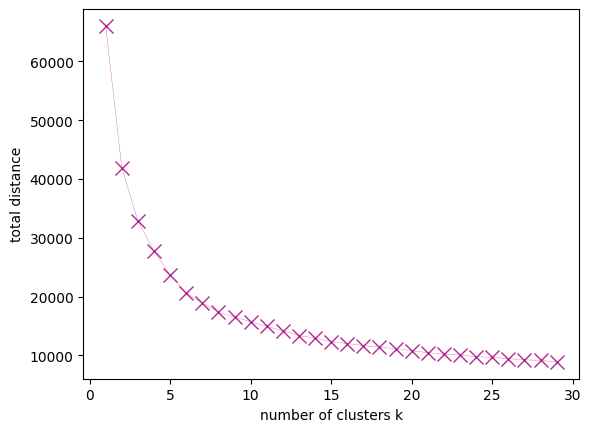

In [20]:
f, (ax) = plt.subplots(1,1)
ax.plot(num_k, errors, lw=0.2, marker= "x", ms= 10, color=get_colors([1])[0] )
ax.set_xlabel("number of clusters k")
ax.set_ylabel("total distance")

In [21]:
# Your code here

In [22]:
# Your code here